In [112]:
from src.ensemble import load_ensemble_model
from src.tomato import load_train_test_split, load_data, Tomato, subsample_data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cPickle as pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud
import pandas as pd
from src.rt_scrape import scrape_movie
from scipy.stats import gaussian_kde
import scipy.stats as sps
%matplotlib inline

In [26]:
logistic_regression_file = "models/logistic_regression.pkl"
naive_bayes_file = "models/naive_bayes.pkl"
cnn_files = ("models/cnn.pkl",
             "models/cnn.json",
             "models/cnn_weights.h5")
train_test_file = "data/train_test.pkl"
ensemble_model = load_ensemble_model(logistic_regression_file,
                                     naive_bayes_file,
                                     cnn_files)

In [27]:
max_pop = max(ensemble_model.cnn_pop_dict.values())

In [28]:
pop_dict = ensemble_model.cnn_pop_dict
# vocabulary = pop_dict.keys()
with open("data/vocabulary.pkl") as f:
    vocabulary = pickle.load(f)
# sentiment = ensemble_model.predict(vocabulary, True)
with open("data/sentiment.pkl") as f:
    sentiment = pickle.load(f)

In [29]:
vocabulary = np.array(vocabulary)

In [30]:
top_indices = np.array(list(reversed(np.argsort(sentiment)[-100:])))

In [7]:
vocabulary[top_indices]

array([u'wonderfully entertaining', u'highly entertaining',
       u'smart entertaining', u'entertaining documentary',
       u'works beautifully', u'surprisingly entertaining',
       u'moving entertaining', u'wonderfully smart', u'moving gripping',
       u'wonderfully intimate', u'wonderfully effective',
       u'surprisingly gripping', u'entertaining ride',
       u'surprisingly effective', u'delivers beautifully',
       u'solid entertaining', u'gripping documentary',
       u'wonderful entertaining', u'works surprisingly', u'works pixar',
       u'pixar delivers', u'wonderfully moving', u'moving beautifully',
       u'wonderfully fun', u'enjoyable documentary',
       u'gripping captivating', u'fun ride', u'richly entertaining',
       u'entertaining gem', u'intimate documentary',
       u'honest entertaining', u'smart enjoyable',
       u'entertaining affectionate', u'fascinating documentary',
       u'thoroughly entertaining', u'surprisingly enjoyable',
       u'zootopia works'

In [31]:
sentiment[top_indices]

array([ 0.95997293,  0.95363084,  0.95227274,  0.95223201,  0.94730463,
        0.9458583 ,  0.94239755,  0.94089402,  0.93927602,  0.93923672,
        0.9390048 ,  0.93858623,  0.93794045,  0.93786034,  0.93785679,
        0.93734885,  0.93701769,  0.93674127,  0.93638464,  0.93514395,
        0.93466672,  0.93451207,  0.93407841,  0.93374396,  0.93355022,
        0.93286943,  0.93224571,  0.9320444 ,  0.93150622,  0.93119323,
        0.93067609,  0.93056487,  0.93050181,  0.93046777,  0.93018535,
        0.93002109,  0.92959204,  0.92957655,  0.92941042,  0.92937732,
        0.92924771,  0.92907386,  0.92882806,  0.92868812,  0.92860053,
        0.92851548,  0.92833377,  0.92827464,  0.92819082,  0.9278656 ,
        0.92778498,  0.92745114,  0.92742526,  0.92708502,  0.92666431,
        0.92654984,  0.92643597,  0.92635388,  0.92578115,  0.92566206,
        0.92544185,  0.92509392,  0.9250239 ,  0.92491796,  0.92475238,
        0.92417935,  0.92414271,  0.9235249 ,  0.92322634,  0.92

In [32]:
# popularity = np.array([pop_dict[word] for word in vocabulary])
with open("data/popularity.pkl") as f:
    popularity = pickle.load(f)
popularity = np.array(popularity)
frequency = np.array([max_pop + 1 - pop for pop in popularity])

In [33]:
popularity[top_indices]

array([ 71321,   8552,  95688,  25479, 135075,  28243, 476137, 245305,
       476122, 245286, 245147, 100741,  20538,  19675, 364227,  60572,
       534859, 245188,  63945, 244454, 179203, 245278, 476109, 245296,
        87433, 534865,  16086, 108431, 357122, 105555, 520542, 272318,
       357151,  31843,  14412,  51896, 144261, 179171,  60380, 290770,
       476053,  65630, 245160, 100655, 103761,  51924, 272321, 364148,
       179202, 109132, 357152, 133148,  52473,  57654, 406283, 272267,
       356793, 272326, 293227, 152545,  31780,  50377, 113516, 534775,
        95139, 245299,  90517,  99088,   7213, 333879, 186544,  68421,
        57371, 272359,  52130, 184544,  87601, 366554, 100787, 364242,
         2491, 276189, 273851, 138476,  23264, 273327, 177416,  11095,
       152501,  74612,  90862, 432114, 179523,  59704, 316181,  84711,
        45294, 534805, 134778, 230167])

In [34]:
bottom_indices = np.argsort(sentiment)[:100]

In [35]:
zip(vocabulary[bottom_indices], sentiment[bottom_indices], 1.*frequency[bottom_indices]/max_pop)

[(u'tedious dull', 0.022228768385083333, 0.47449944569948355),
 (u'uninspired bland', 0.022832121717364928, 0.75644453991236771),
 (u'sadly dull', 0.024930593637399644, 0.48968491337802933),
 (u'unfortunately fails', 0.026833062884457439, 0.75584017941497172),
 (u'bland mess', 0.02836112269548716, 0.25828037594135517),
 (u'tedious incoherent', 0.028667899685769386, 0.8005883413034891),
 (u'pointless mess', 0.028735050449891459, 0.68718519098337827),
 (u'dull tedious', 0.028951309560060413, 0.36225040548584575),
 (u'bland pointless', 0.029326665277946928, 0.25820756142359663),
 (u'lifeless dull', 0.029842441885734167, 0.19352460493573209),
 (u'bland boring', 0.030383760363600285, 0.76023999665053221),
 (u'uninspired mess', 0.030519060363377381, 0.61194230905757985),
 (u'unfunny mess', 0.030613326948404726, 0.75600947316876044),
 (u'dull dreary', 0.030771735105325881, 0.36258353190459114),
 (u'dull pointless', 0.031642850079282046, 0.36228863310766901),
 (u'dull mess', 0.0319465147441905

In [36]:
random_indices = np.random.choice(np.arange(1,max_pop+1), size=1000, replace=False)

/home/jbhersch/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


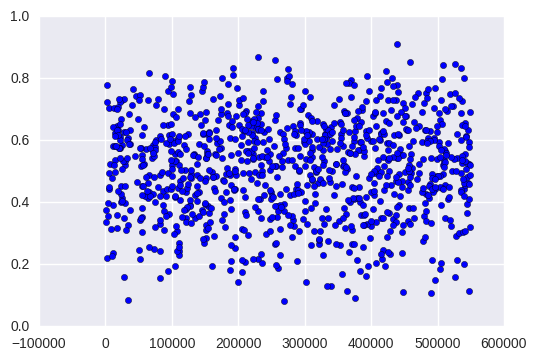

In [37]:
plt.scatter(frequency[random_indices], sentiment[random_indices])
fig = plt.gcf()
fig.show()

In [38]:
num_words = 100
top_vocab = vocabulary[top_indices[:num_words]]
top_sentiment = -1 + 2*sentiment[top_indices[:num_words]]
bottom_vocab = vocabulary[bottom_indices[:num_words]]
bottom_sentiment = -1 + 2*sentiment[bottom_indices[:num_words]]

In [39]:
top_sentiment

array([ 0.91994586,  0.90726169,  0.90454548,  0.90446402,  0.89460925,
        0.89171659,  0.88479509,  0.88178804,  0.87855205,  0.87847345,
        0.87800959,  0.87717246,  0.8758809 ,  0.87572069,  0.87571358,
        0.8746977 ,  0.87403539,  0.87348254,  0.87276929,  0.87028789,
        0.86933343,  0.86902415,  0.86815682,  0.86748792,  0.86710044,
        0.86573885,  0.86449141,  0.86408881,  0.86301243,  0.86238647,
        0.86135218,  0.86112975,  0.86100363,  0.86093554,  0.86037069,
        0.86004218,  0.85918408,  0.85915311,  0.85882084,  0.85875465,
        0.85849542,  0.85814772,  0.85765613,  0.85737623,  0.85720106,
        0.85703097,  0.85666754,  0.85654928,  0.85638163,  0.8557312 ,
        0.85556995,  0.85490228,  0.85485052,  0.85417005,  0.85332861,
        0.85309969,  0.85287194,  0.85270776,  0.8515623 ,  0.85132412,
        0.85088371,  0.85018783,  0.8500478 ,  0.84983592,  0.84950477,
        0.8483587 ,  0.84828541,  0.84704979,  0.84645267,  0.84

In [40]:
bottom_sentiment

array([-0.95554246, -0.95433576, -0.95013881, -0.94633387, -0.94327775,
       -0.9426642 , -0.9425299 , -0.94209738, -0.94134667, -0.94031512,
       -0.93923248, -0.93896188, -0.93877335, -0.93845653, -0.9367143 ,
       -0.93610697, -0.93494067, -0.93433071, -0.93421367, -0.93387101,
       -0.93317944, -0.93248788, -0.93244486, -0.93244319, -0.93201324,
       -0.93116691, -0.93062634, -0.93049918, -0.93000802, -0.92980635,
       -0.92952746, -0.92803465, -0.92790833, -0.92731643, -0.92660389,
       -0.92617648, -0.92611329, -0.92568448, -0.92524325, -0.92483734,
       -0.92472414, -0.92454884, -0.9245162 , -0.92420029, -0.9240318 ,
       -0.9239683 , -0.92318254, -0.9230373 , -0.92137813, -0.92129589,
       -0.92117035, -0.92100486, -0.92002847, -0.91993663, -0.91992047,
       -0.91986965, -0.91949041, -0.91945256, -0.91922719, -0.9186655 ,
       -0.91860137, -0.91852167, -0.9183907 , -0.91756002, -0.91745124,
       -0.91744949, -0.91702579, -0.91684994, -0.91672332, -0.91

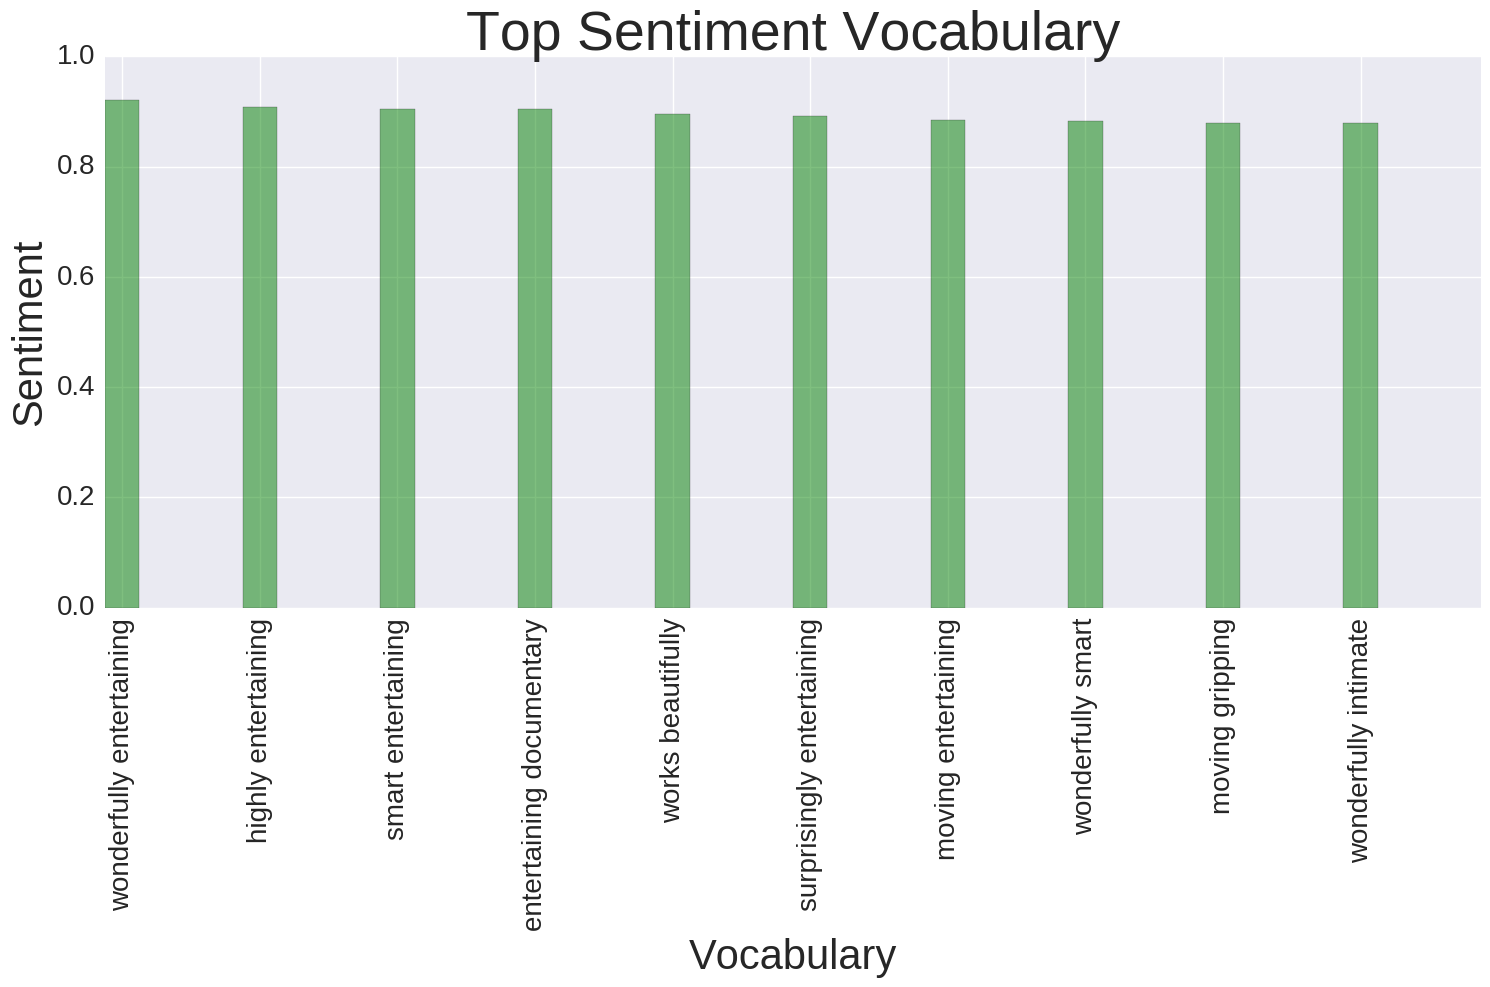

In [41]:
num_words = 10
bar_width = 0.25
index = np.arange(num_words)
plt.figure(figsize=(15,10))
plt.subplot(111)
plt.bar(index, top_sentiment[:num_words], bar_width, alpha=0.5, color='g', label="Sentiment")
plt.xticks(index + 0.5*bar_width, top_vocab[:num_words], rotation=90, size=20)
plt.yticks(size=20)
plt.xlabel("Vocabulary", size=30)
plt.ylabel("Sentiment", size=30)
plt.title("Top Sentiment Vocabulary", size=40)
plt.tight_layout()
plt.show()

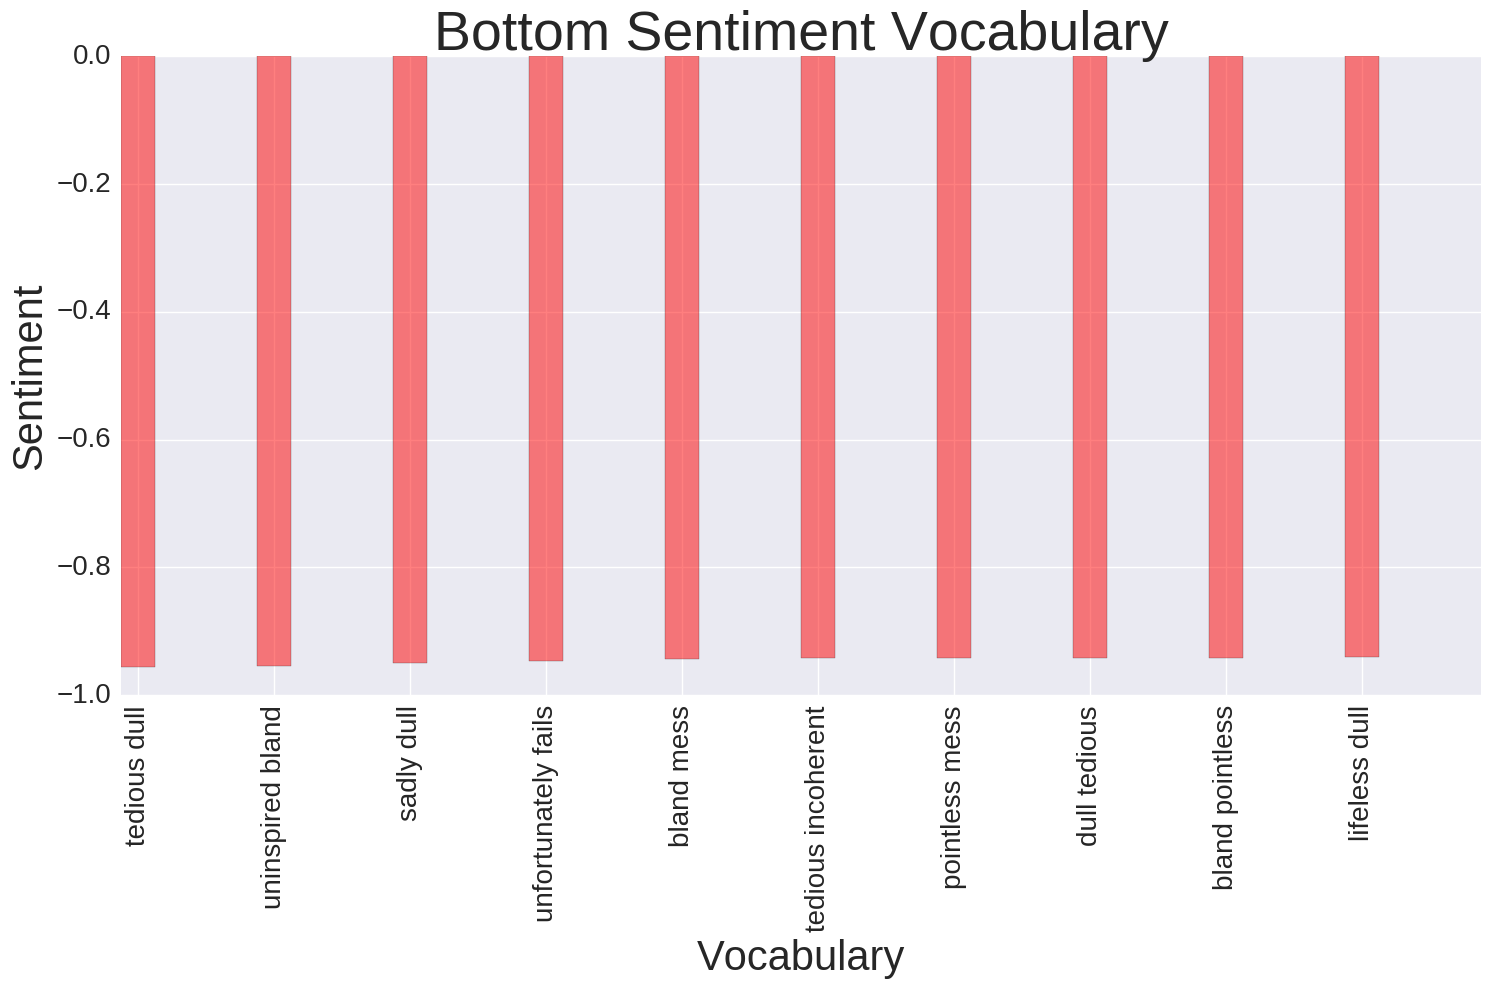

In [42]:
num_words = 10
bar_width = 0.25
index = np.arange(num_words)
plt.figure(figsize=(15,10))
plt.subplot(111)
plt.bar(index, bottom_sentiment[:num_words], bar_width, alpha=0.5, color='r', label="Sentiment")
plt.xticks(index + 0.5*bar_width, bottom_vocab[:num_words], rotation=90, size=20)
plt.yticks(size=20)
plt.xlabel("Vocabulary", size=30)
plt.ylabel("Sentiment", size=30)
plt.title("Bottom Sentiment Vocabulary", size=40)
plt.tight_layout()
plt.show()

In [43]:
tomatoes, corpus, labels = load_data(tomato_file = "data/tomatoes.pkl", 
                                     corpus_file = "data/corpus.pkl", 
                                     labels_file = "data/labels.pkl")

In [44]:
vector_words = CountVectorizer()
vector_words.fit(corpus)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [45]:
# vocabulary_words = np.array(vector_words.vocabulary_.keys())
with open("data/vocabulary_words.pkl") as f:
    vocabulary_words = pickle.load(f)

In [46]:
# sentiment_words = ensemble_model.predict(vocabulary_words, True)
with open("data/sentiment_words.pkl") as f:
    sentiment_words = pickle.load(f)

In [47]:
top_word_indices = np.array(list(reversed(np.argsort(sentiment_words)[-100:])))

In [48]:
top_word_vocab = vocabulary_words[top_word_indices]

In [49]:
top_word_vocab[:100]
# pixar, kaufman, redmayne, winehouse, ridley, favreau, gosling, holocaust?

array([u'gripping', u'entertaining', u'wonderfully', u'gem',
       u'beautifully', u'intimate', u'delight', u'pixar', u'succeeds',
       u'heartbreaking', u'bittersweet', u'brilliant', u'sicario',
       u'absorbing', u'smartly', u'terrific', u'stunning', u'superb',
       u'delightful', u'captivating', u'riveting', u'enjoyable',
       u'perfect', u'potent', u'zootopia', u'favorite', u'wonderful',
       u'marvelous', u'smart', u'petzold', u'tender', u'works', u'moving',
       u'affectionate', u'phoenix', u'refreshingly', u'infectious',
       u'powerful', u'wilderpeople', u'wrenching', u'delivers',
       u'splendidly', u'effective', u'fascinating', u'breezy', u'quietly',
       u'haynes', u'kipling', u'masterpiece', u'creed', u'accessible',
       u'cotillard', u'haunting', u'edgerton', u'surprisingly', u'eggers',
       u'achievement', u'brilliantly', u'exhilarating', u'devastating',
       u'kaufman', u'trachtenberg', u'richly', u'grandma', u'capturing',
       u'saulnier', u'i

In [50]:
top_word_sentiment = -1 + 2*sentiment_words[top_word_indices]

In [51]:
top_word_sentiment[:10]

array([ 0.60541813,  0.58461823,  0.58077997,  0.57588337,  0.57586627,
        0.57022477,  0.56165656,  0.55733451,  0.55691594,  0.55344007])

In [52]:
bottom_word_indices = np.argsort(sentiment_words)[:100]

In [53]:
bottom_word_vocab = vocabulary_words[bottom_word_indices]

In [54]:
bottom_word_vocab[:100]
# heigl, wayans, sandler, murphy, ouija, hackneyed

array([u'bland', u'tedious', u'dull', u'unfortunately', u'pointless',
       u'poorly', u'unfunny', u'inept', u'getaway', u'uninspired',
       u'misfire', u'mediocre', u'sadly', u'lifeless', u'joyless',
       u'incoherent', u'underwhelming', u'lazy', u'incompetent', u'mess',
       u'boring', u'fails', u'witless', u'unsatisfying', u'unconvincing',
       u'wasting', u'heigl', u'disappointing', u'flat', u'lame', u'poor',
       u'dreary', u'listless', u'waste', u'muddled', u'squanders',
       u'disappointment', u'leaden', u'misguided', u'underdeveloped',
       u'inert', u'hollow', u'laughably', u'hercules', u'worst',
       u'uninteresting', u'awful', u'tedium', u'hackneyed', u'empty',
       u'reduces', u'charmless', u'disappointingly', u'forgettable',
       u'trite', u'obnoxious', u'slog', u'vanilla', u'middling', u'rent',
       u'tiresome', u'wooden', u'badly', u'dismal', u'lackluster',
       u'tries', u'flaccid', u'limp', u'pretentious', u'lukewarm',
       u'missing', u'waya

In [55]:
bottom_word_sentiment = -1 + 2*sentiment_words[bottom_word_indices]

In [56]:
bottom_word_sentiment[:10]

array([-0.76076743, -0.71764575, -0.71040806, -0.70039052, -0.69986712,
       -0.69830962, -0.69591213, -0.6879508 , -0.68619082, -0.6811587 ])

In [57]:
zip(bottom_word_vocab[:20], np.ones(20, int))

[(u'bland', 1),
 (u'tedious', 1),
 (u'dull', 1),
 (u'unfortunately', 1),
 (u'pointless', 1),
 (u'poorly', 1),
 (u'unfunny', 1),
 (u'inept', 1),
 (u'getaway', 1),
 (u'uninspired', 1),
 (u'misfire', 1),
 (u'mediocre', 1),
 (u'sadly', 1),
 (u'lifeless', 1),
 (u'joyless', 1),
 (u'incoherent', 1),
 (u'underwhelming', 1),
 (u'lazy', 1),
 (u'incompetent', 1),
 (u'mess', 1)]

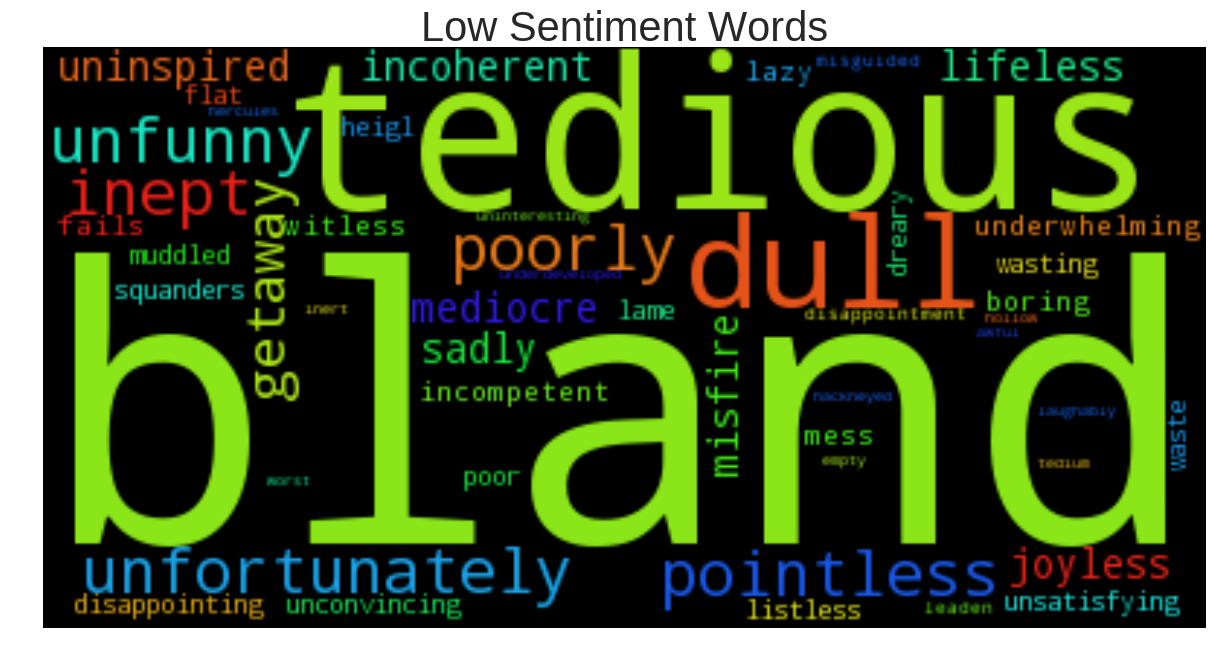

In [59]:
num_words = 50
wordcloud = WordCloud().generate_from_frequencies(zip(bottom_word_vocab[:num_words], np.ones(num_words, int)))
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Low Sentiment Words", size=30)
#     plt.gcf().savefig("images/low_sentiment_wordcloud.png", transparent=True)
    plt.show()    
    # note heigl, hercules

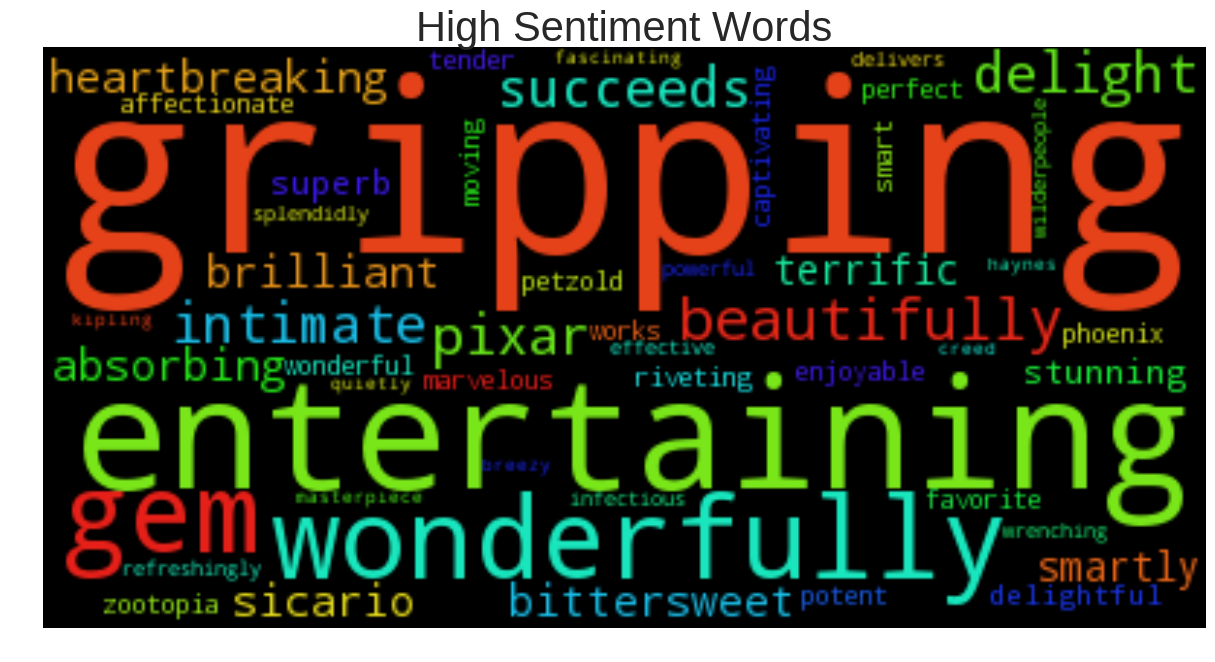

In [60]:
num_words = 50
wordcloud = WordCloud().generate_from_frequencies(zip(top_word_vocab[:num_words], np.ones(num_words, int)))
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("High Sentiment Words", size=30)
#     plt.gcf().savefig("images/high_sentiment_wordcloud.png", transparent=True)
    plt.show()

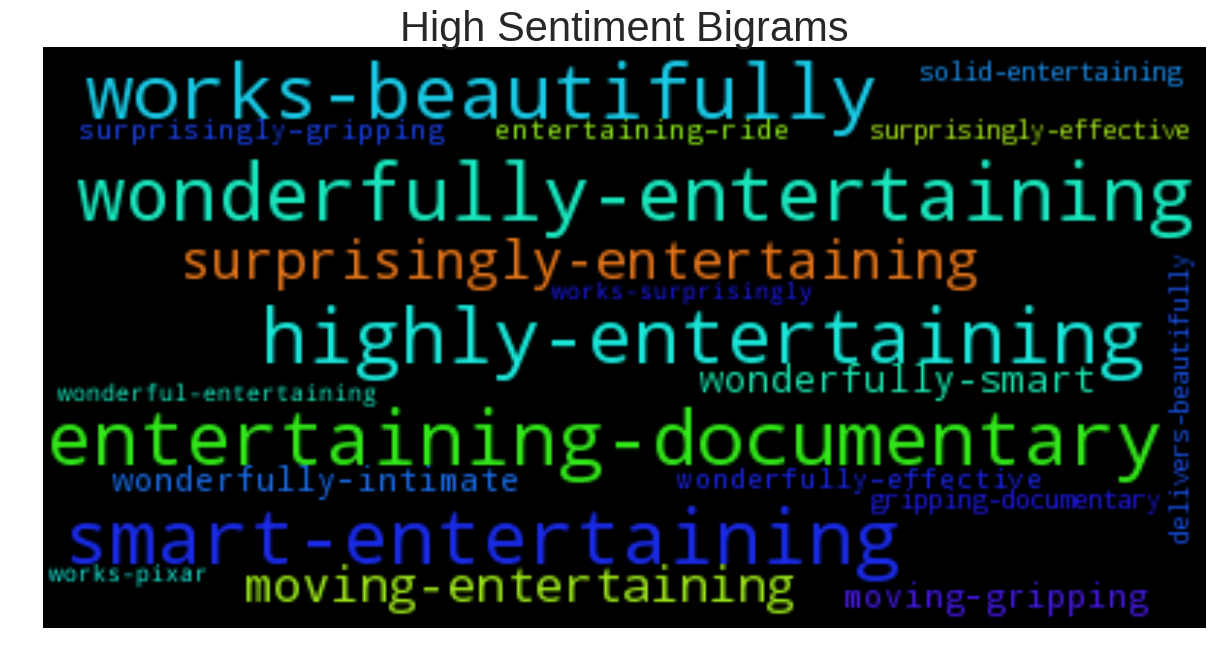

In [61]:
num_words = 20
top_bigrams = ['-'.join(gram.split()) for gram in top_vocab[:num_words]]
wordcloud = WordCloud().generate_from_frequencies(zip(top_bigrams, np.ones(num_words, int)))
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("High Sentiment Bigrams", size=30)
#     plt.gcf().savefig("images/high_sentiment_bigramcloud.png", transparent=True)
    plt.show()

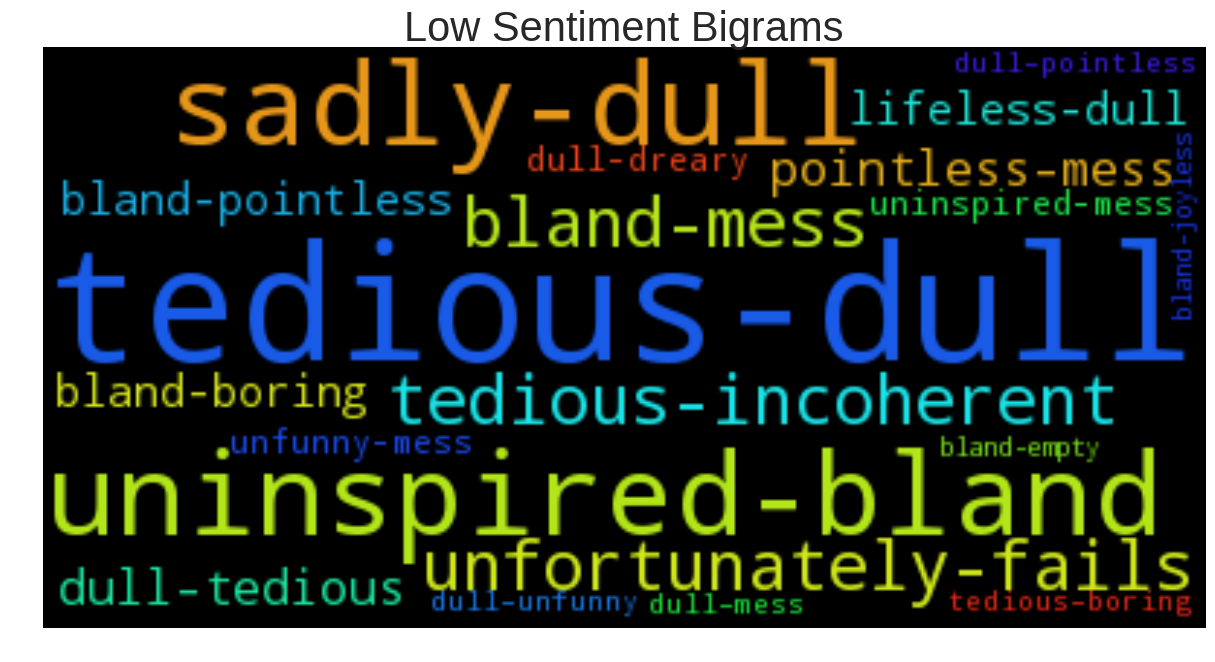

In [62]:
num_words = 20
bottom_bigrams = ['-'.join(gram.split()) for gram in bottom_vocab[:num_words]]
wordcloud = WordCloud().generate_from_frequencies(zip(bottom_bigrams, np.ones(num_words, int)))
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Low Sentiment Bigrams", size=30)
#     plt.gcf().savefig("images/low_sentiment_bigramcloud.png", transparent=True)
    plt.show()

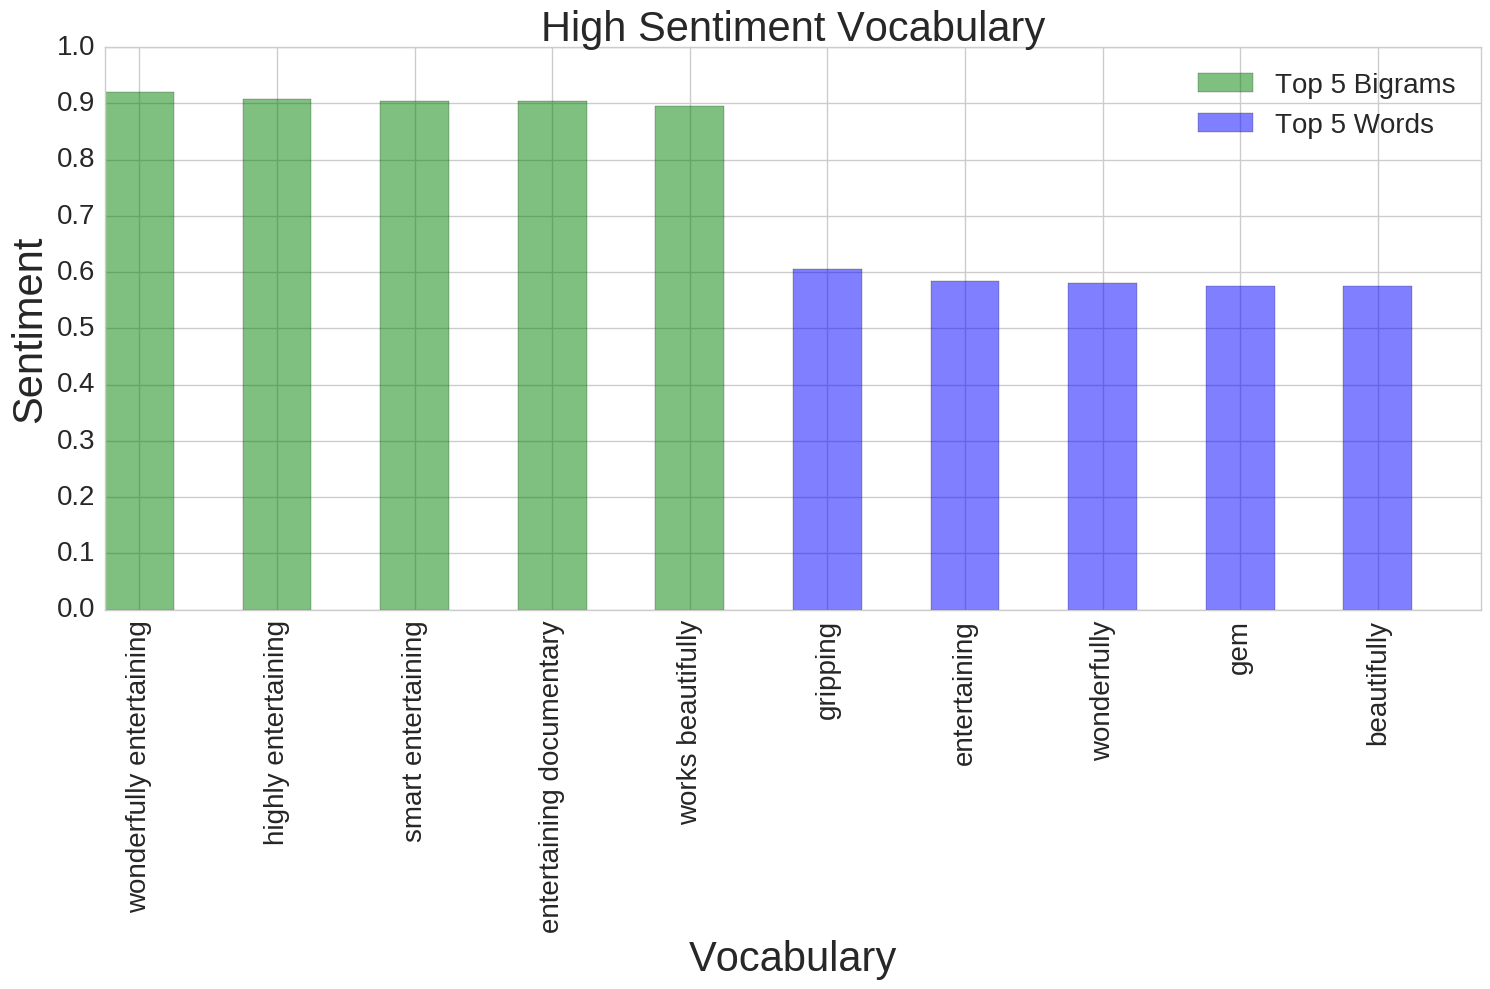

In [63]:
num_words = 5
bar_width = 0.5
index = np.arange(2*num_words)
ts = np.hstack((top_sentiment[:num_words], top_word_sentiment[:num_words]))
tv = np.hstack((top_vocab[:num_words], top_word_vocab[:num_words]))
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.subplot(111)
    plt.bar(index[:num_words], ts[:num_words], bar_width, alpha=0.5, 
            color=['g']*num_words, label="Top {0} Bigrams".format(num_words))
    plt.bar(index[num_words:], ts[num_words:], bar_width, alpha=0.5, 
            color=['b']*num_words, label="Top {0} Words".format(num_words))
    plt.xticks(index + 0.5*bar_width, tv, rotation=90, size=20)
    plt.yticks(np.linspace(0,1,11), size=20)
    plt.xlabel("Vocabulary", size=30)
    plt.ylabel("Sentiment", size=30)
    plt.title("High Sentiment Vocabulary", size=30)
    plt.tight_layout()
    plt.legend(prop={'size':20})
#     plt.gcf().savefig("images/high_sentiment_barchart.png", transparent=True)
    plt.show()

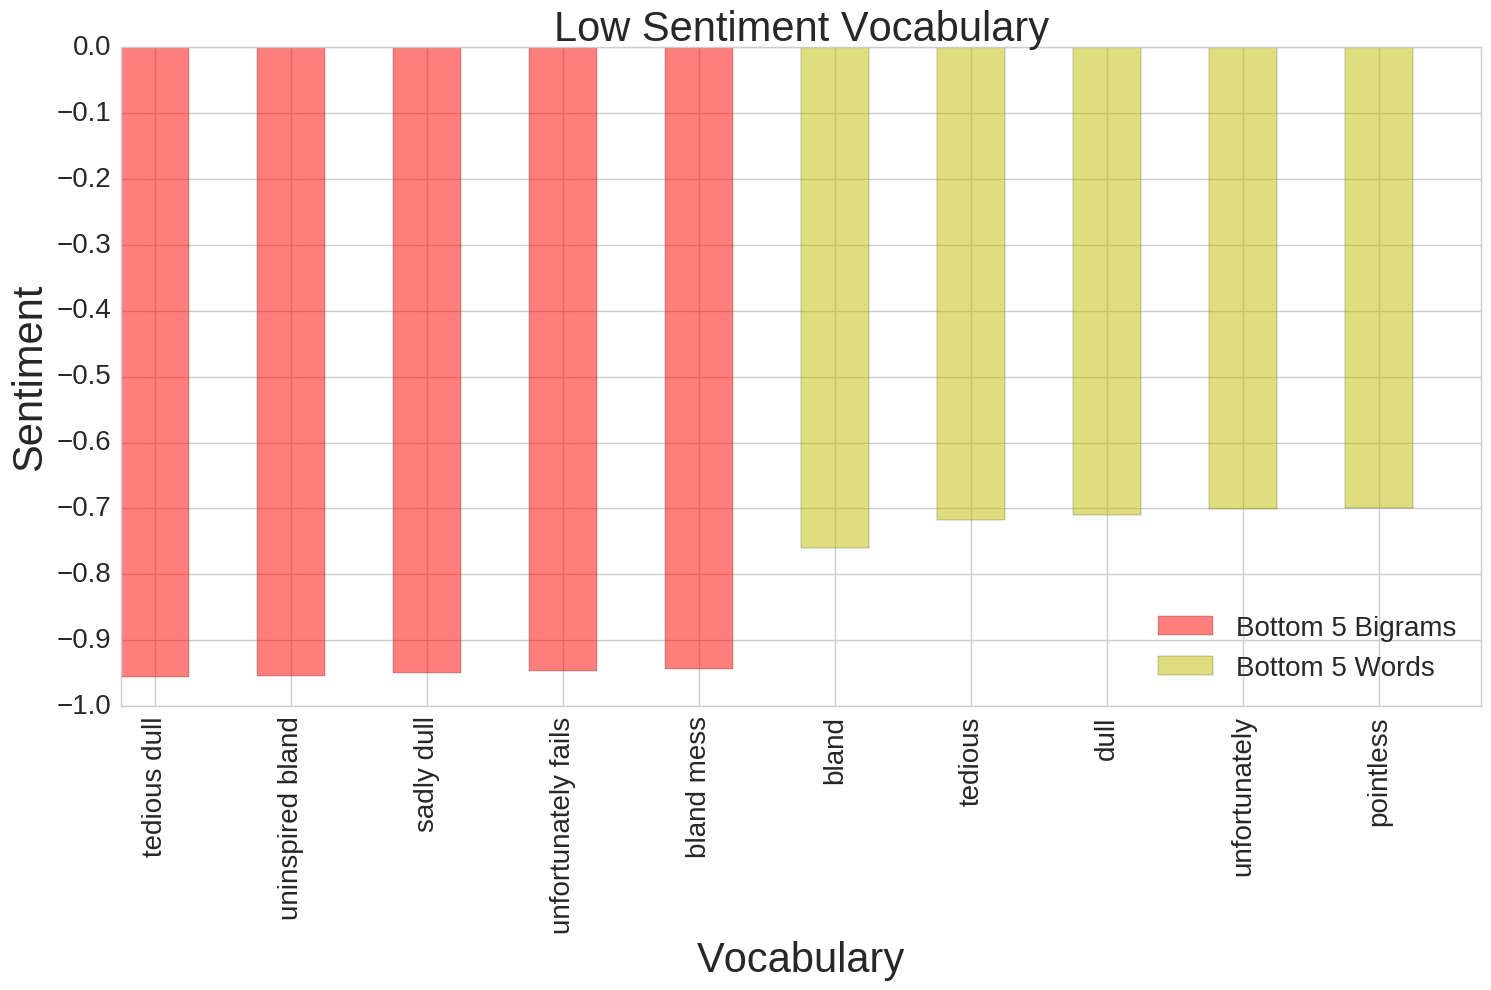

In [64]:
num_words = 5
bar_width = 0.5
index = np.arange(2*num_words)
bs = np.hstack((bottom_sentiment[:num_words], bottom_word_sentiment[:num_words]))
bv = np.hstack((bottom_vocab[:num_words], bottom_word_vocab[:num_words]))
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.subplot(111)
    plt.bar(index[:num_words], bs[:num_words], bar_width, alpha=0.5, color=['r']*num_words, 
            label="Bottom {0} Bigrams".format(num_words))
    plt.bar(index[num_words:], bs[num_words:], bar_width, alpha=0.5, color=['y']*num_words, 
            label="Bottom {0} Words".format(num_words))
    plt.xticks(index + 0.5*bar_width, bv, rotation=90, size=20)
    plt.yticks(np.linspace(0,-1,11), size=20)
    plt.xlabel("Vocabulary", size=30)
    plt.ylabel("Sentiment", size=30)
    plt.title("Low Sentiment Vocabulary", size=30)
    plt.tight_layout()
    plt.legend(prop={'size':20}, loc=4)
#     plt.gcf().savefig("images/low_sentiment_barchart.png", transparent=True)
    plt.show()

In [65]:
random_indices = np.hstack((np.random.choice(np.arange(2,max_pop), size=10000-2, replace=False), np.array([1,max_pop]))) - 1

In [66]:
random_sentiment = -1 + 2*sentiment[random_indices]
linear_regression = LinearRegression().fit(np.array([frequency[random_indices]]).T, np.array([random_sentiment]).T)

In [67]:
linear_regression.score(np.array([frequency[random_indices]]).T, np.array([random_sentiment]).T)

0.00030331600574517997

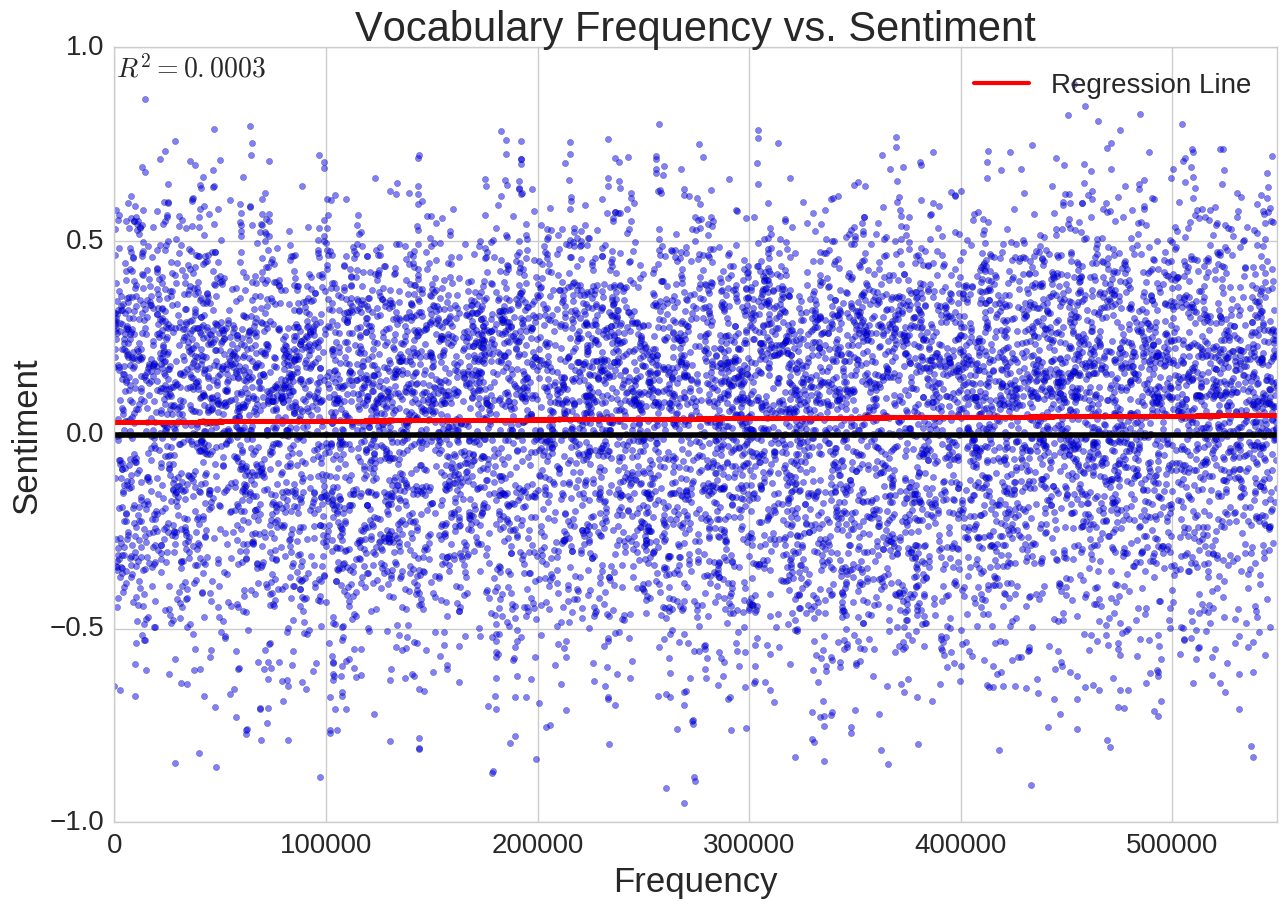

In [68]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.subplot(111)
    plt.scatter(frequency[random_indices], random_sentiment, alpha=0.5)
    plt.axhline(y=0, color='k', linewidth=4)
    plt.plot(frequency[random_indices], linear_regression.predict(np.array([frequency[random_indices]]).T), 
             color='r', label="Regression Line", linewidth=3)
    plt.xlim((0, max_pop))
    plt.xlabel("Frequency", size=25)
    plt.ylabel("Sentiment", size=25)
    plt.title("Vocabulary Frequency vs. Sentiment", size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.legend(prop={'size':20})
    R2 = linear_regression.score(np.array([frequency[random_indices]]).T, np.array([random_sentiment]).T)
    plt.text(1000, 0.925, r'$R^2 = {0}$'.format(round(R2,5)), fontdict={'size':20})
    plt.ylim((-1,1))
#     plt.gcf().savefig("images/vocab_sentiment_regression.png", transparent=True)
    plt.show()

In [69]:
round(R2,5)

0.0003

In [70]:
best_picture_nominees = pd.read_csv("data/best_picture_nominees.csv", header=None)
best_picture_nominees

,0
0,https://www.rottentomatoes.com/m/fences_2016/
1,https://www.rottentomatoes.com/m/moonlight_2016/
2,https://www.rottentomatoes.com/m/la_la_land/
3,https://www.rottentomatoes.com/m/arrival_2016/
4,https://www.rottentomatoes.com/m/lion_2016/
5,https://www.rottentomatoes.com/m/hell_or_high_...
6,https://www.rottentomatoes.com/m/hidden_figures/
7,https://www.rottentomatoes.com/m/hacksaw_ridge/
8,https://www.rottentomatoes.com/m/manchester_by...


In [71]:
urls = best_picture_nominees.values[:,0]
urls

array(['https://www.rottentomatoes.com/m/fences_2016/',
       'https://www.rottentomatoes.com/m/moonlight_2016/',
       'https://www.rottentomatoes.com/m/la_la_land/',
       'https://www.rottentomatoes.com/m/arrival_2016/',
       'https://www.rottentomatoes.com/m/lion_2016/',
       'https://www.rottentomatoes.com/m/hell_or_high_water/',
       'https://www.rottentomatoes.com/m/hidden_figures/',
       'https://www.rottentomatoes.com/m/hacksaw_ridge/',
       'https://www.rottentomatoes.com/m/manchester_by_the_sea/'], dtype=object)

In [72]:
titles = [url.split("/")[-2] for url in urls]
titles

['fences_2016',
 'moonlight_2016',
 'la_la_land',
 'arrival_2016',
 'lion_2016',
 'hell_or_high_water',
 'hidden_figures',
 'hacksaw_ridge',
 'manchester_by_the_sea']

In [73]:
oscar_tomatoes = [scrape_movie(title) for title in titles]

In [74]:
rt_oscar_scores = [oscar.score for oscar in oscar_tomatoes]
rt_oscar_scores = np.array(100*np.round(rt_oscar_scores, decimals=2), int)
rt_oscar_scores

array([93, 97, 93, 94, 86, 98, 92, 86, 96])

In [75]:
tomautometer_scores = [ensemble_model.predict_tomato(oscar) for oscar in oscar_tomatoes]
tomautometer_scores = np.array(100*np.round(tomautometer_scores, decimals=2), int)
tomautometer_scores

array([87, 94, 90, 91, 79, 96, 88, 87, 88])

In [76]:
oscar_titles = ["Fences", "Moonlight", "La La Land", "Arrival", "Lion", "Hell Or High Water", "Hidden Figures",
                "Hacksaw Ridge", "Manchester By The Sea"]

In [77]:
oscars_table = zip(oscar_titles, rt_oscar_scores, tomautometer_scores)
oscars_table.sort(key=lambda x: x[0])
oscars_table

[('Arrival', 94, 91),
 ('Fences', 93, 87),
 ('Hacksaw Ridge', 86, 87),
 ('Hell Or High Water', 98, 96),
 ('Hidden Figures', 92, 88),
 ('La La Land', 93, 90),
 ('Lion', 86, 79),
 ('Manchester By The Sea', 96, 88),
 ('Moonlight', 97, 94)]

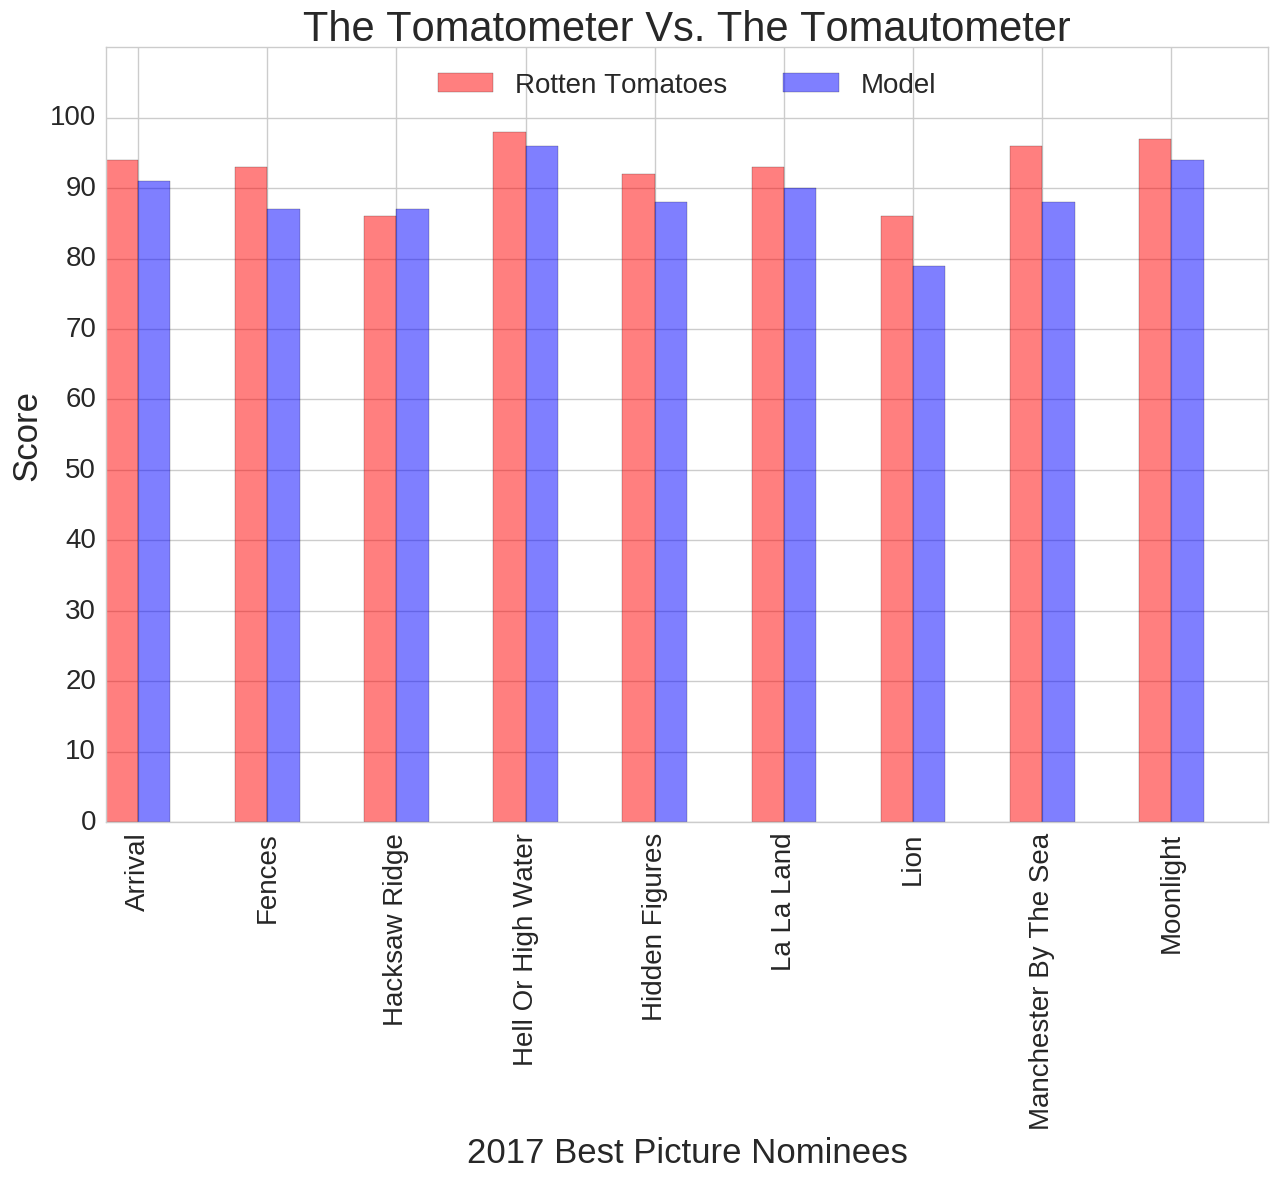

In [78]:
num_films = len(oscar_titles)
bar_width = 0.25
index = np.arange(num_films)
film_titles = [x[0] for x in oscars_table]
film_rt_scores = [x[1] for x in oscars_table]
film_scores = [x[2] for x in oscars_table]
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.bar(index, film_rt_scores, bar_width, alpha=0.5, color='r', 
            label="Rotten Tomatoes")    
    plt.bar(index + bar_width, film_scores, bar_width, alpha=0.5, color='b', 
            label="Model")    
    plt.yticks(np.linspace(0,100,11), size=20)
    plt.ylim((0,110))
    plt.ylabel("Score", size=25)
    plt.xticks(index + bar_width, film_titles, rotation=90, size=20)
    plt.xlabel("2017 Best Picture Nominees", size=25)
    plt.legend(ncol=2, prop={'size':20}, loc=9)
    plt.title("The Tomatometer Vs. The Tomautometer", size=30)
#     plt.gcf().savefig("images/oscar_films_barchart.png", transparent=True)
    
    plt.show()

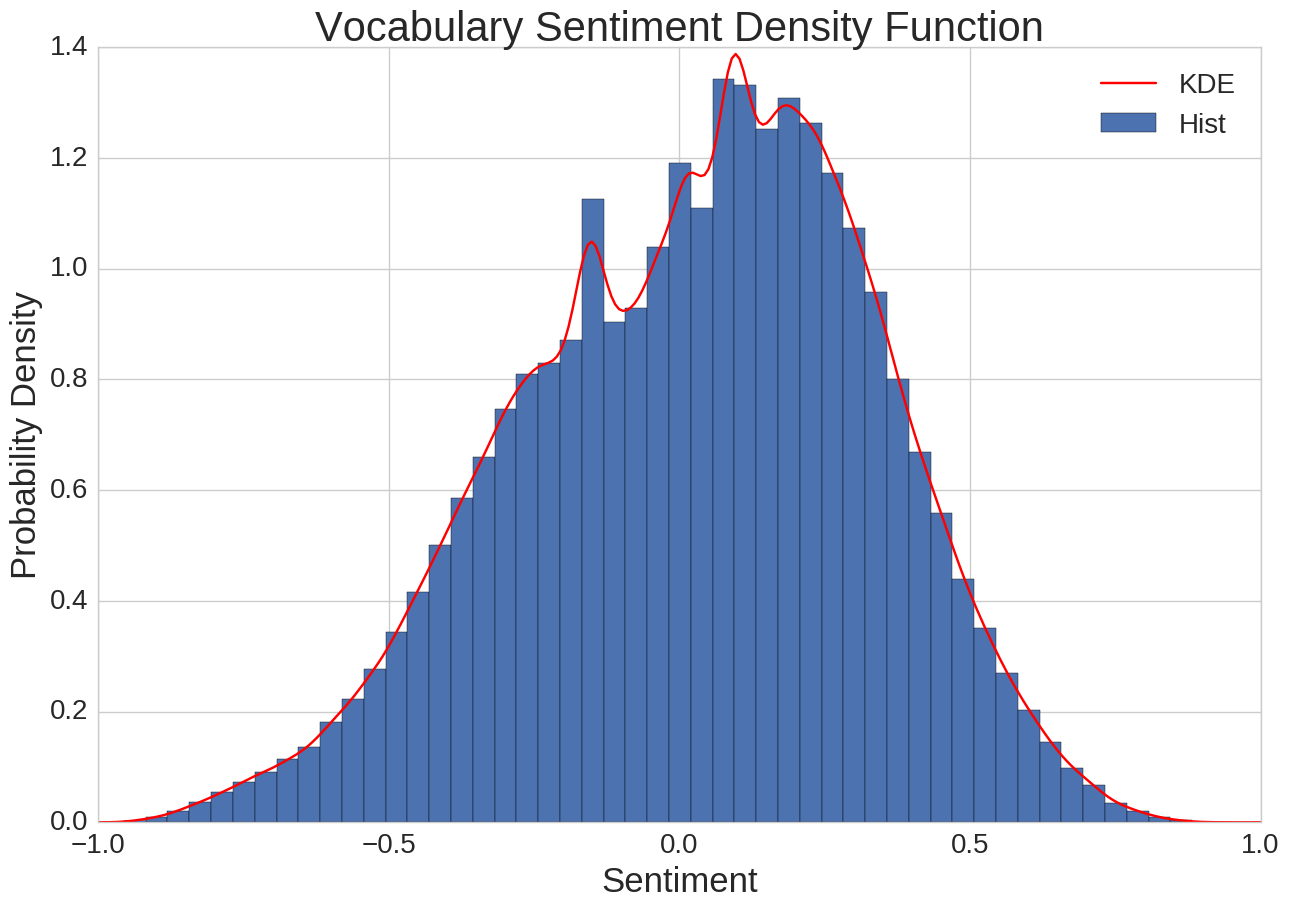

In [79]:
pos_sentiment = -1 + 2*sentiment[sentiment>=0.5]
neg_sentiment = -1 + 2*sentiment[sentiment<0.5]
vocab_kernal = gaussian_kde(-1 + 2*sentiment)
x_range = np.linspace(-1,1,300)
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.hist(-1 + 2*sentiment, bins=50, normed=True, label="Hist")
    plt.plot(x_range, vocab_kernal(x_range), c='r', label="KDE")
    plt.xlabel("Sentiment", size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.ylabel("Probability Density", size=25)
    plt.title("Vocabulary Sentiment Density Function", size=30)
    plt.legend(prop={'size':20}) 
#     plt.gcf().savefig("images/vocab_sentiment_pdf.png", transparent=True)
    
    plt.show()

# with sns.axes_style("whitegrid"):
#     plt.figure(figsize=(15,10))
#     plt.subplot(1,2,1)
#     plot_vocab_sentiment_pdf()
#     plt.subplot(1,2,2)
#     plot_vocab_sentiment_pdf()
    
#     plt.show()
    

In [80]:
def plot_vocab_sentiment_pdf():
    vocab_kernal = gaussian_kde(-1 + 2*sentiment)
    x_range = np.linspace(-1,1,300)
    plt.hist(-1 + 2*sentiment, bins=50, normed=True, label="Hist")
    plt.plot(x_range, vocab_kernal(x_range), c='r', label="KDE")
    plt.xlabel("Sentiment")
    plt.xticks()
    plt.yticks()
    plt.ylabel("Probability Density")
    plt.title("Vocabulary Sentiment Density Function")
    plt.legend()

In [81]:
corpus_sentiment = -1 + 2*ensemble_model.predict(corpus, True)

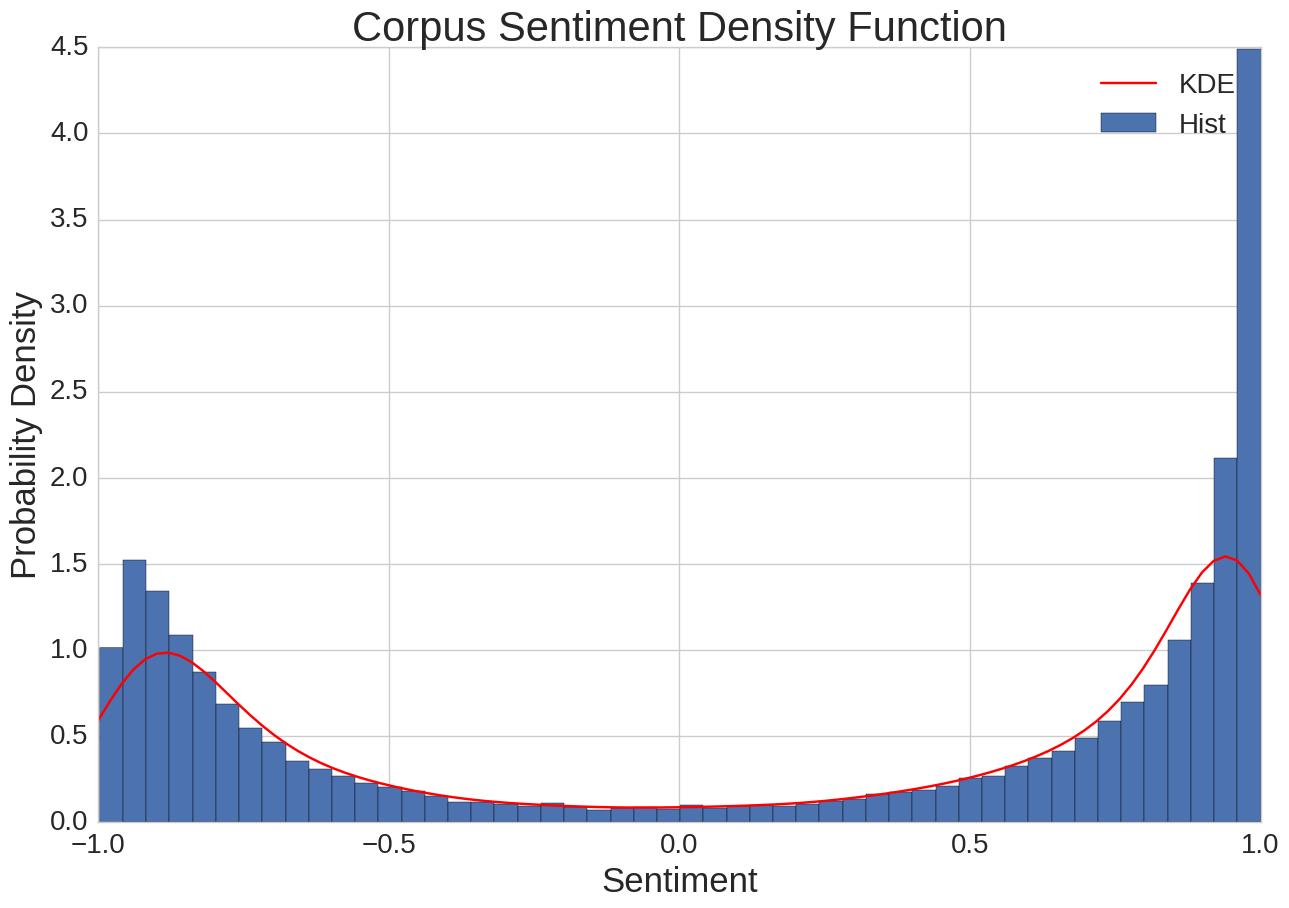

In [82]:
corpus_kernal = gaussian_kde(corpus_sentiment)
x_range = np.linspace(-1,1,100)
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.hist(corpus_sentiment, bins=50, normed=True, label="Hist")
    plt.plot(x_range, corpus_kernal(x_range), c='r', label="KDE")
    plt.xlabel("Sentiment", size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.ylabel("Probability Density", size=25)
    plt.title("Corpus Sentiment Density Function", size=30)
    plt.legend(prop={'size':20}) 
#     plt.gcf().savefig("images/corpus_sentiment_pdf.png", transparent=True)
    
    plt.show()
    

In [83]:
def plot_corpus_sentiment_pdf():
    corpus_kernal = gaussian_kde(corpus_sentiment)
    x_range = np.linspace(-1,1,100)
    plt.hist(corpus_sentiment, bins=50, normed=True, label="Histogram")
    plt.plot(x_range, corpus_kernal(x_range), c='r', label="KDE")
    plt.xlabel("Sentiment")
    plt.xticks()
    plt.yticks()
    plt.ylabel("Probability Density")
    plt.title("Corpus Sentiment Density Function")
    plt.legend() 

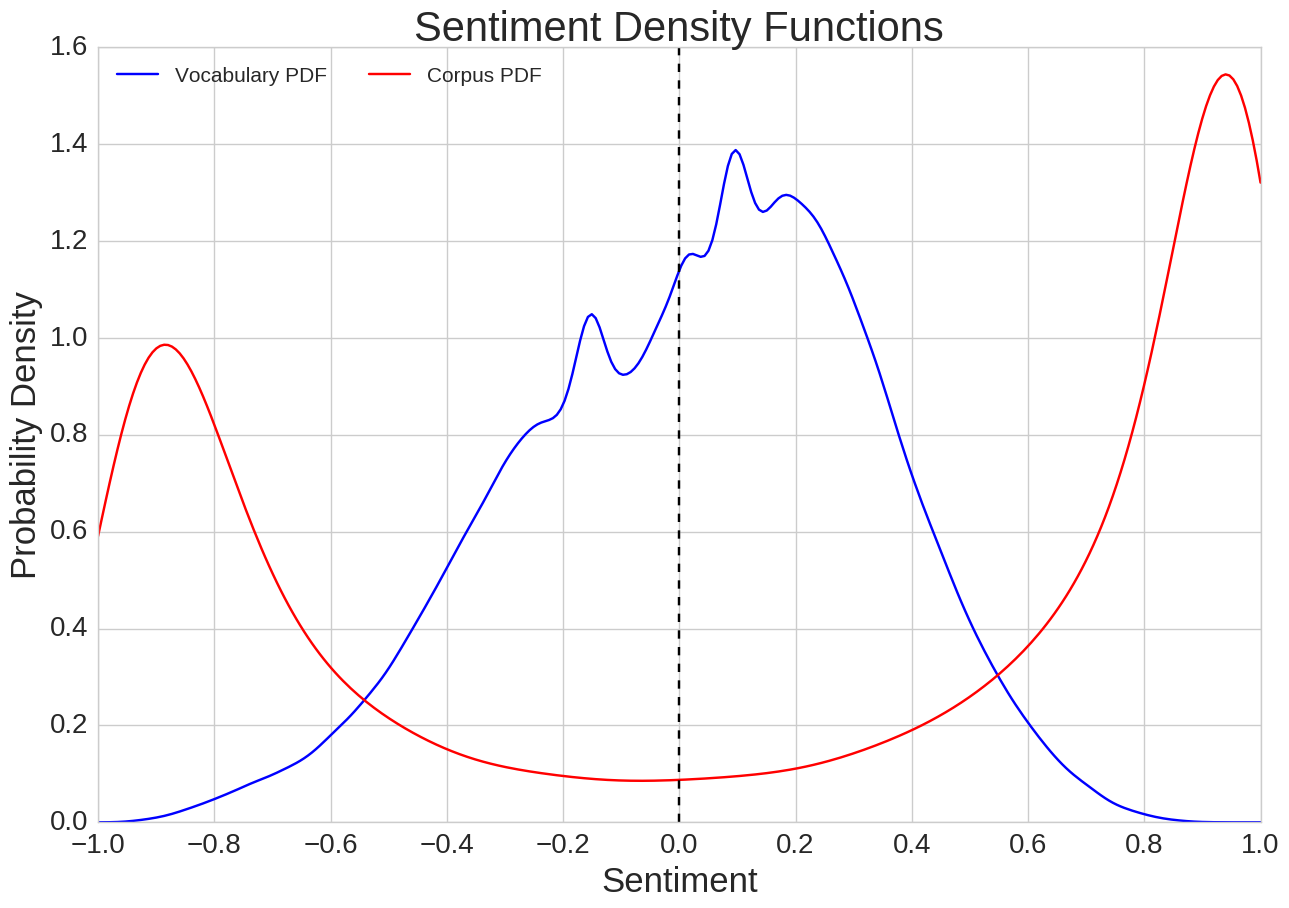

In [84]:
x_range = np.linspace(-1,1,300)
v_mean = np.mean(-1+2*sentiment)
c_mean = np.mean(corpus_sentiment)
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.plot(x_range, vocab_kernal(x_range), c='b', label="Vocabulary PDF")
#     plt.axvline(x=v_mean, c='k', linestyle='--', label="Vocabulary Mean")
    plt.plot(x_range, corpus_kernal(x_range), c='r', label="Corpus PDF")   
#     plt.axvline(x=c_mean, c='r', linestyle='--', label="Corpus Mean")
    plt.axvline(x=0, c='k', linestyle='--')
    plt.xlabel("Sentiment", size=25)
    plt.xticks(np.linspace(-1,1,11), size=20)
    plt.yticks(size=20)
    plt.ylabel("Probability Density", size=25)
    plt.title("Sentiment Density Functions", size=30)
    plt.legend(prop={'size':15}, loc="upper left", ncol=2) 
#     plt.gcf().savefig("images/sentiment_pdf.png", transparent=True)
    
    plt.show()
    


In [85]:
def plot_sentiment_pdf():
    vocab_kernal = gaussian_kde(-1 + 2*sentiment)
    corpus_kernal = gaussian_kde(corpus_sentiment)
    x_range = np.linspace(-1,1,300)
    v_mean = np.mean(-1+2*sentiment)
    c_mean = np.mean(corpus_sentiment)
    plt.plot(x_range, vocab_kernal(x_range), c='k', label="Vocabulary PDF")
    plt.axvline(x=v_mean, c='k', linestyle='--', label="Vocabulary Mean")
    plt.plot(x_range, corpus_kernal(x_range), c='r', label="Corpus PDF")   
    plt.axvline(x=c_mean, c='r', linestyle='--', label="Corpus Mean")
    plt.xlabel("Sentiment", size=25)
    plt.xticks(np.linspace(-1,1,11))
    plt.yticks(size=20)
    plt.ylabel("Probability Density")
    plt.title("Sentiment Density Functions")
    plt.legend(loc="upper left", ncol=2) 

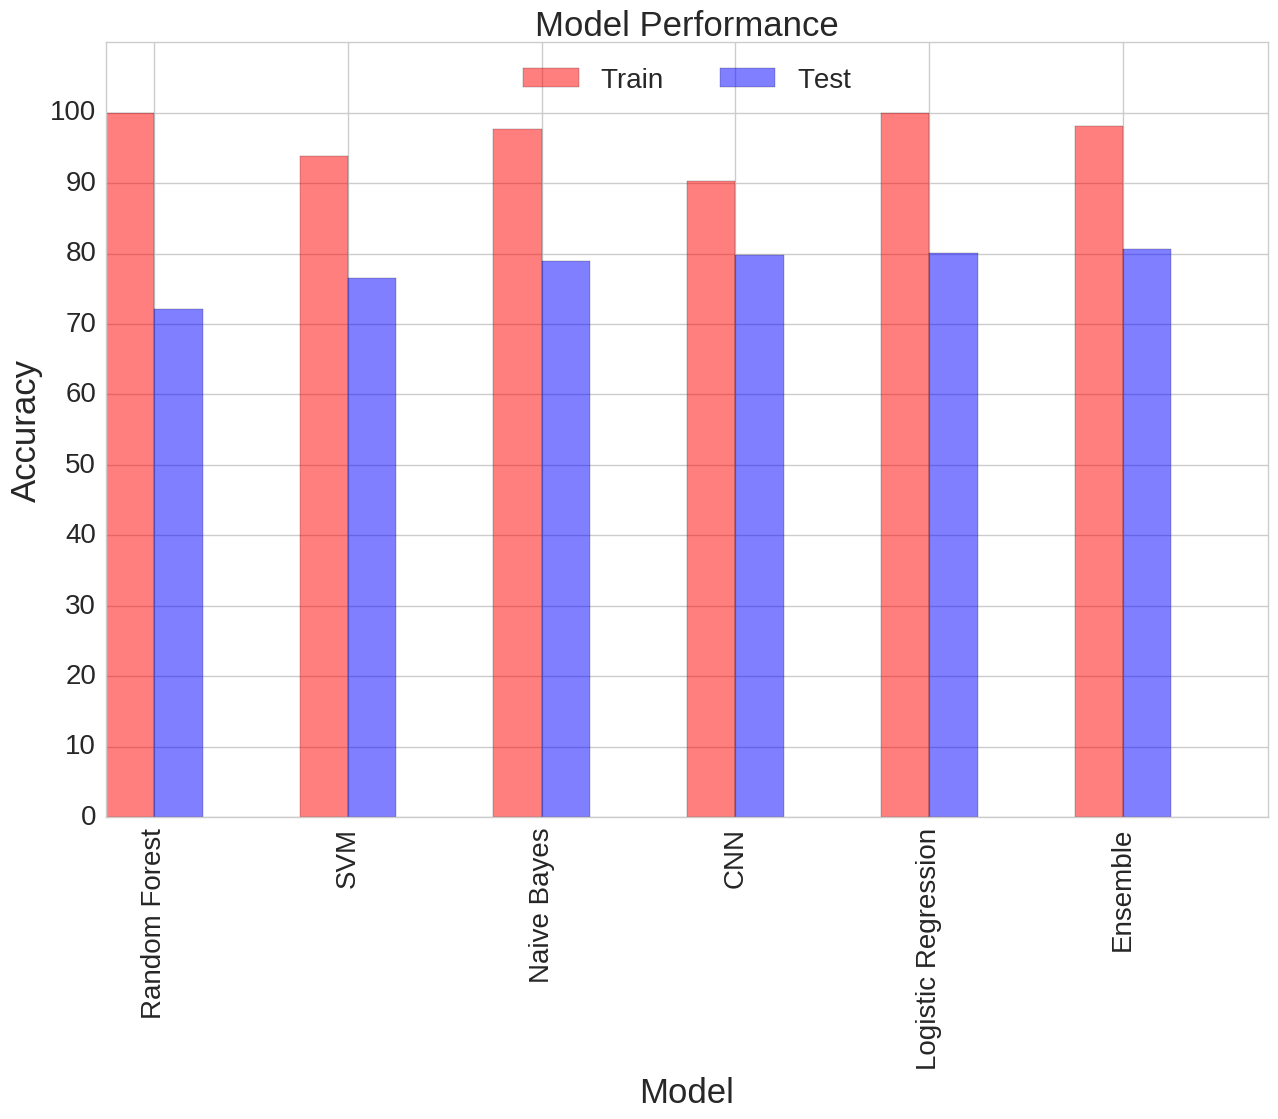

In [110]:
nlp_models = ["Logistic Regression", "Naive Bayes", "CNN", "SVM", "Random Forest", "Ensemble"]
train_accuracy = [0.998993943937, 0.976347819226, 0.90266900755763535, 0.938926479001, 0.999802734105, 0.980766575267]
test_accuracy = [0.800142023039, 0.789963705223, 0.79824838251538588, 0.765583083478, 0.72139813792, 0.807164273315]

num_models = len(nlp_models)
bar_width = 0.25
index = np.arange(num_models)

model_performance = sorted( zip(nlp_models, train_accuracy, test_accuracy), key=lambda x: x[2])

nlp_models = [x[0] for x in model_performance]
train_accuracy = [100*x[1] for x in model_performance]
test_accuracy = [100*x[2] for x in model_performance]

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.bar(index, train_accuracy, bar_width, alpha=0.5, color='r', label="Train")
    plt.bar(index + bar_width, test_accuracy, bar_width, alpha=0.5, color='b', label="Test")
    plt.xticks(index + bar_width, nlp_models, rotation=90, size=20)
    plt.yticks(np.linspace(0,100,11), size=20)
    plt.ylim((0,110))
    plt.xlabel("Model", size=25)
    plt.ylabel("Accuracy", size=25)
    plt.title("Model Performance", size=25)
    plt.legend(ncol=2, prop={'size':20}, loc=9)
#     plt.gcf().savefig("images/model_performance_barchart.png", transparent=True)
    
    plt.show()

In [94]:
all_movies = tomatoes.keys()
all_rt_scores = 100*np.array([tomatoes[key].score for key in tomatoes])

In [90]:
np.mean(ensemble_model.predict(tomatoes[all_movies[0]].reviews))

0.94230769230769229

In [91]:
all_model_scores = 100*np.array([np.mean(ensemble_model.predict(tomatoes[key].reviews)) for key in tomatoes])

In [95]:
all_rt_errors = all_rt_scores - all_model_scores

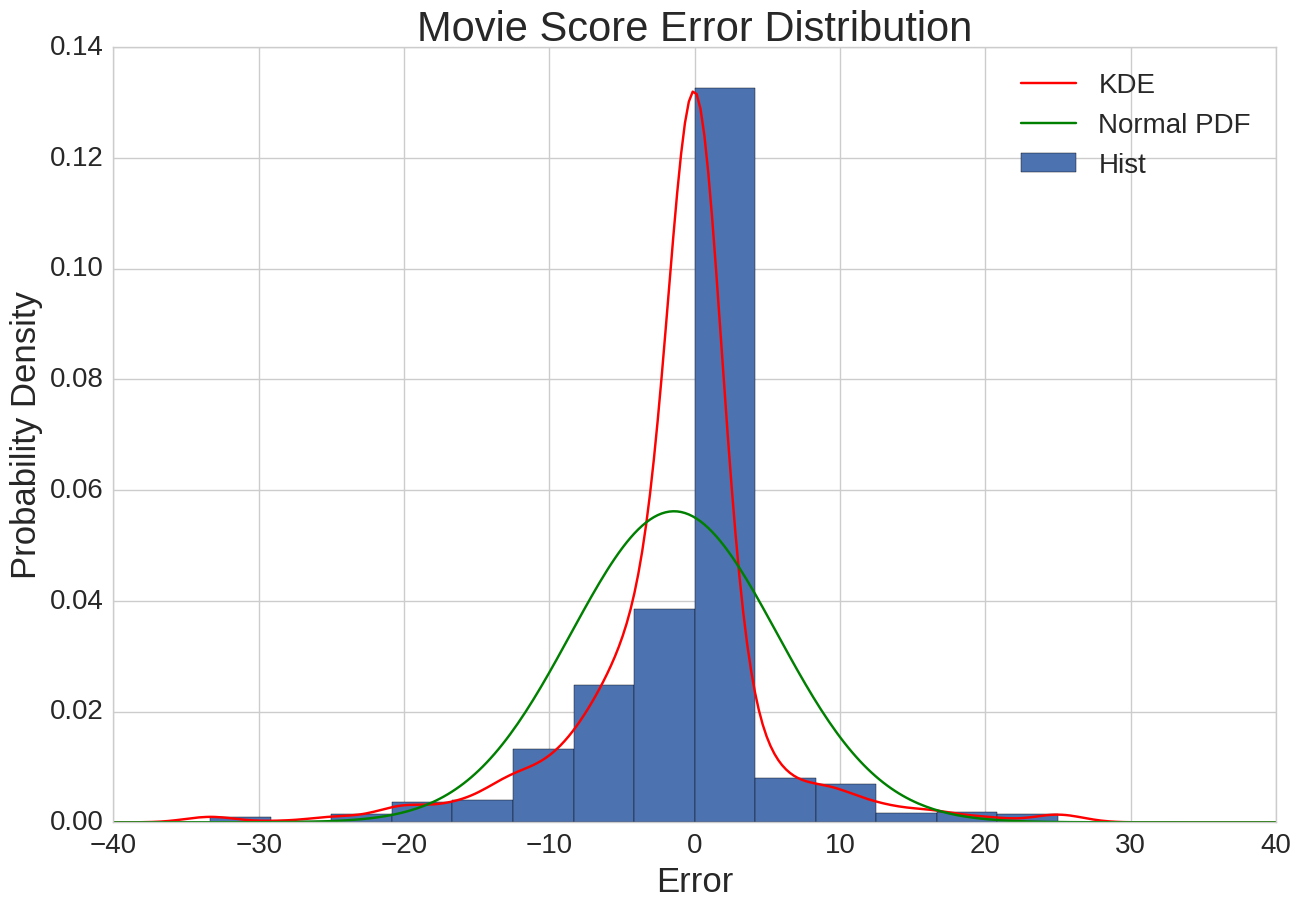

In [116]:
error_kernal = gaussian_kde(all_rt_errors)
x_range = np.linspace(-40,40,300)
error_mean = np.mean(all_rt_errors)
error_std = np.std(all_rt_errors)
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(15,10))
    plt.hist(all_rt_errors, bins=30, normed=True, label="Hist")
    plt.plot(x_range, error_kernal(x_range), c="r", label="KDE")
    plt.plot(x_range, sps.norm.pdf(x_range, loc=error_mean, scale=error_std), c='g', label="Normal PDF")
    
    plt.xlim((-40,40))
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    plt.xlabel("Error", size=25)
    plt.ylabel("Probability Density", size=25)
    plt.title("Movie Score Error Distribution", size=30)
    
    plt.legend(prop={'size':20})
    
#     plt.gcf().savefig("images/movie_score_error_pdf.png", transparent=True)
    
    plt.show()

In [103]:
np.std(all_rt_errors)

7.0996729867574526